In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import django

print(django.get_version())

4.2.11


In [38]:
# Load your data into a pandas DataFrame
# data = pd.read_csv('global-data-on-sustainable-energy (1).csv')
data = pd.read_csv('billionares.csv')
# data = pd.read_csv('accidents.csv')

data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,NaN,NaN,NaN,NaN
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN


In [39]:
data['category']=data['category'].astype('category')
data['industries']=data['industries'].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data = data.select_dtypes(include=[np.number])

# data = data[['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']]
data.drop([ 'latitude_country', 'longitude_country','rank','finalWorth','population_country','gdp_country', 'birthDay', 'birthMonth', 'birthYear'], axis=1, inplace=True)
data.head()

,category,age,industries,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,NaN,NaN,NaN,NaN
1,0,51.0,0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
2,16,59.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
3,16,78.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
4,5,92.0,5,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN


In [40]:
from sklearn.preprocessing import MinMaxScaler

data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(0)
# data.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
data.head()



C:\Users\fahee\AppData\Local\Temp\ipykernel_7228\244316814.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\fahee\AppData\Local\Temp\ipykernel_7228\244316814.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,category,age,industries,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,96.0,91.0,98.0,98.0
1,0,51.0,0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
2,16,59.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
3,16,78.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
4,5,92.0,5,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0


[{'name': '1', 'value': 0.5514290145458656}, {'name': '2', 'value': 0.19203008594088147}, {'name': '3', 'value': 0.10744483255892343}, {'name': '4', 'value': 0.06565206863491825}, {'name': '5', 'value': 0.02684900177093878}, {'name': '6', 'value': 0.01969588747923961}, {'name': '7', 'value': 0.014044315758132456}, {'name': '8', 'value': 0.0075630830500168994}, {'name': '9', 'value': 0.00668168062858621}, {'name': '10', 'value': 0.003332456091618599}, {'name': '11', 'value': 0.002705512454512182}, {'name': '12', 'value': 0.0017831974109204876}, {'name': '13', 'value': 0.000616666462419775}, {'name': '14', 'value': 0.00017219721302628684}, {'name': '15', 'value': 3.421477607784664e-33}]


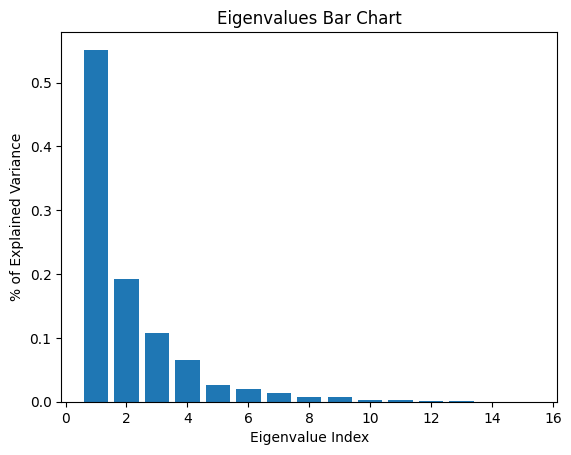

Optimal di: 4


In [41]:
from kneed import KneeLocator

pca = PCA(n_components=len(data.columns))
pca.fit_transform(data)

eigenvalues = pca.explained_variance_ratio_

# print(eigenvalues)
pca_scree_data = [{'name': str(i+1), 'value': eigenvalues[i]} for i in range(len(eigenvalues))]
print(pca_scree_data)
plt.bar(range(1,len(eigenvalues)+1), eigenvalues)
plt.xlabel('Eigenvalue Index')
plt.ylabel('% of Explained Variance')
plt.title('Eigenvalues Bar Chart')
# plt.yscale('log')
plt.show()


di_vals = range(1, len(eigenvalues) + 1)
knee = KneeLocator(di_vals, eigenvalues, curve='convex', direction='decreasing')
optimal_di = knee.knee

print("Optimal di:", optimal_di)


In [42]:

def sum_square_loadings(data, di):
    pca = PCA(n_components=di)
    pca.fit_transform(data)

    loadings = pca.components_
    loadings_sum = np.sum(loadings**2, axis=0)
    top_attributes = np.argsort(loadings_sum)[-4:]

    sum_square_loadings = [{'name': data.columns[attribute], 'value': loadings_sum[attribute]} for attribute in top_attributes[::-1]]

    return sum_square_loadings

print(sum_square_loadings(data, 4))


[{'name': 'age', 'value': 0.9874632181533253}, {'name': 'total_tax_rate_country', 'value': 0.9867071520632936}, {'name': 'cpi_country', 'value': 0.9812741745695782}, {'name': 'gross_tertiary_education_enrollment', 'value': 0.9544223126713712}]


In [16]:

# Construct a scatterplot matrix using the top attributes
scatterplot_data = data.iloc[:, top_attributes]
pd.plotting.scatter_matrix(scatterplot_data)
plt.show()


NameError: name 'top_attributes' is not defined

C:\Users\fahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

[{'name': 1, 'value': 4435379.51611756}, {'name': 2, 'value': 2595132.725931541}, {'name': 3, 'value': 1819630.123303662}, {'name': 4, 'value': 1569065.5432132147}, {'name': 5, 'value': 1327100.0497825667}, {'name': 6, 'value': 1191278.607347996}, {'name': 7, 'value': 1012104.9797502897}, {'name': 8, 'value': 916392.6815454436}, {'name': 9, 'value': 867720.2650020873}, {'name': 10, 'value': 821130.5328411089}]
Optimal k: 3


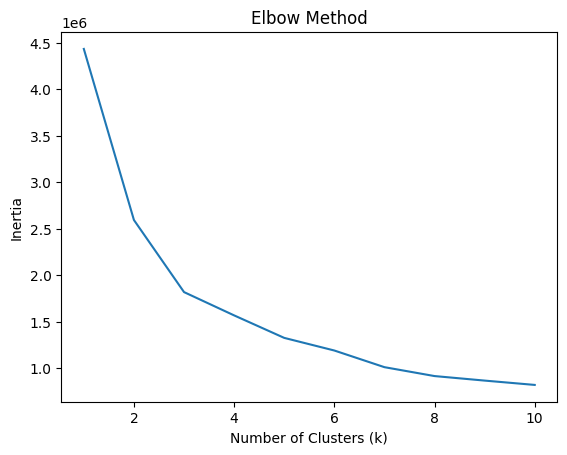

In [45]:
from kneed import KneeLocator

# Use k-means to find clusters
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


k_means_data = [{'name': k_values[i], 'value': inertia[i]} for i in range(len(k_values))]
print(k_means_data)


knee = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

print("Optimal k:", optimal_k)

# Visualize the elbow method
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


C:\Users\fahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


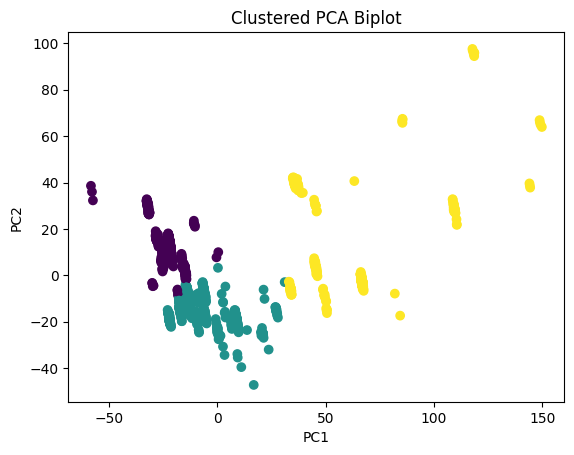

   category   age  industries  cpi_country  cpi_change_country
0         4  74.0           4       110.05                 1.1
1         0  51.0           0       117.24                 7.5
2        16  59.0          16       117.24                 7.5
3        16  78.0          16       117.24                 7.5
4         5  92.0           5       117.24                 7.5


In [44]:
# Perform K-means clustering with the optimal k value
di = int(input("di: "))
pca = PCA(n_components=di)
pca.fit(data)
transformed_data = pca.transform(data)

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(transformed_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the clustered PCA biplot
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered PCA Biplot')
plt.show()

data.head()
print(data[data.columns[range(5)]].head())

In [36]:

import json
from sklearn.preprocessing import MinMaxScaler

def getLab2Data(data,  k=3, di=4):
    data['category']=data['category'].astype('category')
    data['industries']=data['industries'].astype('category')

    cat_columns = data.select_dtypes(['category']).columns
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.select_dtypes(include=[np.number])

    # data = data[['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']]
    data.drop([ 'latitude_country', 'longitude_country','rank','finalWorth','population_country','gdp_country', 'birthYear'], axis=1, inplace=True)
    data.fillna(method='ffill',inplace=True)
    data.fillna(method='bfill',inplace=True)
    data.fillna(0)



    output = {}

    pca = PCA(n_components=di)
    pca.fit(data)
    
    transformed_data = pca.transform(data)
    loadings = pca.components_
    loadings_sum = np.sum(loadings**2, axis=0)
    top_attributes = np.argsort(loadings_sum)[-4:]

    sum_square_loadings = [{'name': data.columns[attribute], 'value': loadings_sum[attribute]} for attribute in top_attributes[::-1]]


    output['sum_squares_loading'] = sum_square_loadings

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transformed_data)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    scatterplot_matrix_data = data[data.columns[top_attributes]]
    scatterplot_matrix_data['clusterId'] = cluster_labels

    output['scatterplot_matrix_data'] = scatterplot_matrix_data.to_dict('records')

    pca_scatterplot_data = transformed_data[:, :2]

# Create an instance of MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))

    pca_scatterplot_data = scaler.fit_transform(pca_scatterplot_data)


    pca_scatterplot_data = pd.DataFrame(pca_scatterplot_data, columns=['x', 'y'])
    pca_scatterplot_data['clusterId'] = cluster_labels

    output['pca_scatterplot_data'] = pca_scatterplot_data.to_dict('records')

    top_attribute_vectors = loadings[:, top_attributes]

    output['top_attribute_vectors'] = [{'x': top_attribute_vectors[0][i], 'y': top_attribute_vectors[1][i], 'name': data.columns[top_attributes[i]]} for i in range(len(top_attributes))][::-1]
        
    return output

data = pd.read_csv('billionares.csv')
# data['category']=data['category'].astype('category')
# data['industries']=data['industries'].astype('category')

# cat_columns = data.select_dtypes(['category']).columns
# data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
# data = data.select_dtypes(include=[np.number])

# # data = data[['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']]
# data.drop([ 'latitude_country', 'longitude_country','rank','finalWorth','population_country','gdp_country'], axis=1, inplace=True)
# data = data.fillna(data.median())

#save lab2Data to a json file
output = getLab2Data(data, 3, 4)
with open('lab2Data.json', 'w') as f:
    json.dump(output, f)
    f.close()
    print('lab2Data.json saved')



    

    



    
     

C:\Users\fahee\AppData\Local\Temp\ipykernel_7228\1006598771.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)
C:\Users\fahee\AppData\Local\Temp\ipykernel_7228\1006598771.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill',inplace=True)
C:\Users\fahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fahee\AppData\Local\Temp\ipykernel_7228\1006598771.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

lab2Data.json saved
